Import required libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# Set the option to display all columns
pd.set_option('display.max_columns', None)

# Set the option to display all rows
pd.set_option('display.max_rows', None)

Load our datasets

In [31]:
# Get our file path for the .csv files
file_paths = [f for f in os.listdir("./Dataset/") if f.endswith('.csv')]

# Define list for our data frames
li = []

# Loop through our file paths and read the .csv files into a data frame
for filename in file_paths:
    filename = "./Dataset/" + filename
    
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

# Concatenate our data frames into one central data frame
match_df = pd.concat(li, axis=0, ignore_index=True)

# Have a look at our data frame
match_df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,Time,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,11/08/2017,Arsenal,Leicester,4,3,H,2,2,D,M Dean,27,6,10,3,9,12,9,4,0,1,0,0,1.53,4.5,6.50,1.50,4.60,6.75,1.47,4.5,6.50,1.44,4.40,6.50,1.53,4.55,6.85,1.53,4.2,6.00,1.53,4.50,6.50,41.0,1.55,1.51,4.60,4.43,6.89,6.44,37.0,1.65,1.61,2.43,2.32,21.0,-1.00,1.91,1.85,2.10,2.02,1.49,4.73,7.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,12/08/2017,Brighton,Man City,0,2,A,0,0,D,M Oliver,6,14,2,4,6,9,3,10,0,2,0,0,11.00,5.5,1.33,11.00,5.25,1.30,8.00,5.3,1.35,10.00,5.00,1.30,10.95,5.55,1.34,10.00,4.8,1.33,10.00,5.50,1.33,40.0,11.50,10.10,5.60,5.25,1.36,1.32,35.0,1.70,1.63,2.40,2.27,20.0,1.50,1.95,1.91,2.01,1.96,11.75,6.15,1.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,12/08/2017,Chelsea,Burnley,2,3,A,0,3,A,C Pawson,19,10,6,5,16,11,8,5,3,3,2,0,1.25,6.5,15.00,1.22,6.50,12.50,1.22,6.2,13.50,1.25,5.75,15.00,1.26,6.30,15.25,1.25,5.5,13.00,1.25,6.25,15.00,41.0,1.27,1.24,6.55,6.06,15.50,13.67,36.0,1.71,1.66,2.33,2.23,20.0,-1.75,2.03,1.97,1.95,1.90,1.33,5.40,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,12/08/2017,Crystal Palace,Huddersfield,0,3,A,0,2,A,J Moss,14,8,4,6,7,19,12,9,1,3,0,0,1.83,3.6,5.00,1.80,3.50,4.75,1.85,3.5,4.30,1.80,3.40,4.60,1.83,3.58,5.11,1.80,3.3,5.00,1.83,3.60,5.00,41.0,1.86,1.81,3.65,3.50,5.11,4.82,36.0,2.19,2.11,1.79,1.72,18.0,-0.75,2.10,2.05,1.86,1.83,1.79,3.56,5.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,12/08/2017,Everton,Stoke,1,0,H,1,0,H,N Swarbrick,9,9,4,1,13,10,6,7,1,1,0,0,1.70,3.8,5.75,1.70,3.60,5.50,1.70,3.7,5.00,1.67,3.60,5.25,1.70,3.83,5.81,1.70,3.5,5.50,1.70,3.80,5.75,40.0,1.71,1.69,3.85,3.69,6.00,5.50,35.0,2.17,2.08,1.80,1.76,19.0,-0.75,1.94,1.90,2.01,1.98,1.82,3.49,5.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Get our team overall ratings by season
team_overall_ratings_df = pd.read_csv("./Dataset/seasonal_ratings/seasonal_team_rating.csv", index_col=None, header=0)

# Have a look at our data frame
team_overall_ratings_df.head()

,Season,Team,Rating
0,2022-2023,Man City,85
1,2022-2023,Liverpool,84
2,2022-2023,Arsenal,82
3,2022-2023,Chelsea,82
4,2022-2023,Man United,82


Re-format dataset structure / namings etc. and join both datasets together

In [33]:
# Drop the "Div" column as this is just indicates what football division the data is for
# not relevant for our analysis as we already know it is looking at the Premier League
match_df = match_df.drop(["Div"], axis=1)

In [34]:
# Add season column to see what season the match was played in

# Convert Date column from object to datetime
match_df["Date"] = pd.to_datetime(match_df["Date"], format='%d/%m/%Y')

# Define the date ranges for each season from 2017/18 to 2022/23
seasons = {
    '2017-2018': ('2017-08-11', '2018-05-13'),
    '2018-2019': ('2018-08-10', '2019-05-12'),
    '2019-2020': ('2019-08-09', '2020-07-26'),
    '2020-2021': ('2020-09-12', '2021-05-23'),
    '2021-2022': ('2021-08-13', '2022-05-22'),
    '2022-2023': ('2022-08-05', '2023-05-28')
}

# Define a function to get the season given a date
def get_season(date):
    
    for season, (start_date, end_date) in seasons.items():
        if pd.to_datetime(start_date) <= date <= pd.to_datetime(end_date):
            return season
        
    return 'Unknown'  # or whatever you want to return when the date doesn't fall into any of the defined seasons

match_df["Season"] = match_df["Date"].apply(get_season)

In [35]:
# Check the seasons have been added correctly by checking each season has the same number of matches (380)
match_df["Season"].value_counts()

Season
2017-2018    380
2018-2019    380
2019-2020    380
2020-2021    380
2021-2022    380
2022-2023    380
Name: count, dtype: int64

In [36]:
# Add the away and home team overall ratings to the match data frame

# Merge to get the home team ratings
match_df = pd.merge(match_df, team_overall_ratings_df, how='left', left_on=['Season', 'HomeTeam'], right_on=['Season', 'Team'])
match_df = match_df.rename(columns={'Rating': 'home_rating_overall'})
match_df = match_df.drop('Team', axis=1)  # drop the extra 'team' column

# Merge to get the away team ratings
match_df = pd.merge(match_df, team_overall_ratings_df, how='left', left_on=['Season', 'AwayTeam'], right_on=['Season', 'Team'])
match_df = match_df.rename(columns={'Rating': 'away_rating_overall'})
match_df = match_df.drop('Team', axis=1)  # drop the extra 'team' column

match_df.shape

(2280, 129)

Look at some basic statistics of the dataset

In [37]:
# Returns the summary of the DataFrame
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Columns: 129 entries, Date to away_rating_overall
dtypes: datetime64[ns](1), float64(103), int64(18), object(7)
memory usage: 2.2+ MB


In [38]:
# Returns the statistical summary for numerical columns
match_df.describe()

,Date,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,home_rating_overall,away_rating_overall
count,2280,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,380.000000,380.000000,380.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.00000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,2280.000000,2280.000000,2280.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1519.000000,1519.000000,1519.000000,1519.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1517.000000,1517.000000,1517.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1519.000000,1519.000000,1520.000000,1520.00000,1520.00000,1520.000000,1520.000000,1519.000000,1519.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,2280.000000,2280.000000
mean,2020-07-10 08:19:34.736841984,1.519298,1.245175,0.682018,0.566228,13.610526,11.302193,4.682456,3.968421,10.455263,10.568421,5.670175,4.659211,1.556579,1.687281,0.049561,0.059211,3.052075,4.304031,4.864031,2.994561,4.226263,4.736732,2.956333,4.160943,4.566482,3.030105,4.139842,5.392316,3.106259,4.366351,5.037939,3.035689,4.142768,4.886934,3.100750,4.232232,5.063259,37.078947,3.363079,3.111368,4.656342,4.340934,6.078395,5.327750,34.205263,1.94475,1.871184,2.178934,2.079079,20.043421,-0.331250,2.013974,1.954829,1.994382,1.937684,3.143627,4.385189,5.019693,3.191480,4.457243,5.079289,3.002138,4.213987,4.603191,1.834510,2.088282,1.872014,2.138828,1.906033,2.186862,1.835803,2.094461,-0.257401,1.954336,1.950934,1.968934,1.956224,1.995941,1.990336,1.941842,1.935737,2.968316,4.202388,4.435421,2.966980,4.172026,4.453276,2.967950,4.079631,4.337930,3.027730,4.092855,4.607868,3.064789,4.163711,4.670092,3.290789,4.508632,5.129500,3.029717,4.223974,4.567375,1.846941,2.089447,1.887465,2.143351,1.931882,2.23748,1.84775,2.101803,-0.242105,1.945425,1.959131,1.961428,1.968526,2.015868,2.029276,1.935329,1.947717,78.350000,78.350000
min,2017-08-11 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.060000,2.800000,1.120000,1.050000,2.900000,1.130000,1.070000,2.700000,1.120000,1.080000,2.900000,1.180000,1.070000,2.950000,1.130000,1.050000,2.900000,1.120000,1.050000,2.900000,1.130000,32.000000,1.080000,1.060000,3.060000,2.930000,1.160000,1.130000,25.000000,1.24000,1.220000,1.450000,1.400000,14.000000,-3.000000,1.550000,1.500000,1.440000,1.400000,1.040000,2.890000,1.090000,1.090000,3.100000,1.180000,1.070000,2.970000,1.150000,1.220000,1.440000,1.200000,1.470000,1.220000,1.510000,1.210000,1.470000,-3.000000,1.70

In [39]:
# This will print the number of null values in each column
print(match_df.isnull().sum())

Date                      0
HomeTeam                  0
AwayTeam                  0
FTHG                      0
FTAG                      0
FTR                       0
HTHG                      0
HTAG                      0
HTR                       0
Referee                   0
HS                        0
AS                        0
HST                       0
AST                       0
HF                        0
AF                        0
HC                        0
AC                        0
HY                        0
AY                        0
HR                        0
AR                        0
B365H                     0
B365D                     0
B365A                     0
BWH                       0
BWD                       0
BWA                       0
IWH                       0
IWD                       0
IWA                       0
LBH                    1900
LBD                    1900
LBA                    1900
PSH                       0
PSD                 

In [40]:
# This will return a DataFrame with rows that have at least one missing value
df_with_nulls = match_df[match_df.isnull().any(axis=1)]

# To see the DataFrame
df_with_nulls.head()

# After comparing the original datasets in excel, certain seasons are missing some columns of data, most the NaN values are for the match betting odds columns
# Which we will not be using for our analysis so it is not a major problem, we will just drop these columns

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,Time,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Season,home_rating_overall,away_rating_overall
0,2017-08-11,Arsenal,Leicester,4,3,H,2,2,D,M Dean,27,6,10,3,9,12,9,4,0,1,0,0,1.53,4.5,6.50,1.50,4.60,6.75,1.47,4.5,6.50,1.44,4.40,6.50,1.53,4.55,6.85,1.53,4.2,6.00,1.53,4.50,6.50,41.0,1.55,1.51,4.60,4.43,6.89,6.44,37.0,1.65,1.61,2.43,2.32,21.0,-1.00,1.91,1.85,2.10,2.02,1.49,4.73,7.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-2018,82,78
1,2017-08-12,Brighton,Man City,0,2,A,0,0,D,M Oliver,6,14,2,4,6,9,3,10,0,2,0,0,11.00,5.5,1.33,11.00,5.25,1.30,8.00,5.3,1.35,10.00,5.00,1.30,10.95,5.55,1.34,10.00,4.8,1.33,10.00,5.50,1.33,40.0,11.50,10.10,5.60,5.25,1.36,1.32,35.0,1.70,1.63,2.40,2.27,20.0,1.50,1.95,1.91,2.01,1.96,11.75,6.15,1.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-2018,75,84
2,2017-08-12,Chelsea,Burnley,2,3,A,0,3,A,C Pawson,19,10,6,5,16,11,8,5,3,3,2,0,1.25,6.5,15.00,1.22,6.50,12.50,1.22,6.2,13.50,1.25,5.75,15.00,1.26,6.30,15.25,1.25,5.5,13.00,1.25,6.25,15.00,41.0,1.27,1.24,6.55,6.06,15.50,13.67,36.0,1.71,1.66,2.33,2.23,20.0,-1.75,2.03,1.97,1.95,1.90,1.33,5.40,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-2018,83,77
3,2017-08-12,Crystal Palace,Huddersfield,0,3,A,0,2,A,J Moss,14,8,4,6,7,19,12,9,1,3,0,0,1.83,3.6,5.00,1.80,3.50,4.75,1.85,3.5,4.30,1.80,3.40,4.60,1.83,3.58,5.11,1.80,3.3,5.00,1.83,3.60,5.00,41.0,1.86,1.81,3.65,3.50,5.11,4.82,36.0,2.19,2.11,1.79,1.72,18.0,-0.75,2.10,2.05,1.86,1.83,1.79,3.56,5.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-2018,76,74
4,2017-08-12,Everton,Stoke,1,0,H,1,0,H,N Swarbrick,9,9,4,1,13,10,6,7,1,1,0,0,1.70,3.8,5.75,1.70,3.60,5.50,1.70,3.7,5.00,1.67,3.60,5.25,1.70,3.83,5.81,1.70,3.5,5.50,1.70,3.80,5.75,40.0,1.71,1.69,3.85,3.69,6.00,5.50,35.0,2.17,2.08,1.80,1.76,19.0,-0.75,1.94,1.90,2.01,1.98,1.82,3.49,5.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-2018,79,76


In [41]:
# Drop the rows with betting odds columns
col_index = match_df.columns.get_loc('B365H')  # Get the index of the first betting feature column
match_df = match_df.iloc[:, np.r_[0:col_index, -3:0]]  # Select all columns from start to 'col' and the last 3 columns

match_df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season,home_rating_overall,away_rating_overall
0,2017-08-11,Arsenal,Leicester,4,3,H,2,2,D,M Dean,27,6,10,3,9,12,9,4,0,1,0,0,2017-2018,82,78
1,2017-08-12,Brighton,Man City,0,2,A,0,0,D,M Oliver,6,14,2,4,6,9,3,10,0,2,0,0,2017-2018,75,84
2,2017-08-12,Chelsea,Burnley,2,3,A,0,3,A,C Pawson,19,10,6,5,16,11,8,5,3,3,2,0,2017-2018,83,77
3,2017-08-12,Crystal Palace,Huddersfield,0,3,A,0,2,A,J Moss,14,8,4,6,7,19,12,9,1,3,0,0,2017-2018,76,74
4,2017-08-12,Everton,Stoke,1,0,H,1,0,H,N Swarbrick,9,9,4,1,13,10,6,7,1,1,0,0,2017-2018,79,76


Perform data visualization to get a better understanding of the data

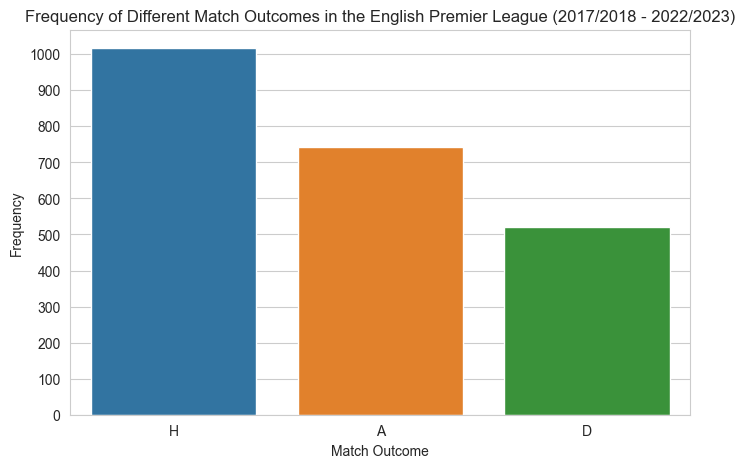

In [123]:
# Compare the frequency of the different results in the English Premier League across all seasons of data
plt.figure(figsize=(8, 5))

# Create our bar plot
bar_plot = sns.barplot(
    x = match_df['FTR'].value_counts().index,
    y = match_df['FTR'].value_counts().values,
    hue = match_df['FTR'].value_counts().index
)

# Change the y ticks so we can see the values better
bar_plot.set_yticks(np.arange(0, 1100, 100))

# Set the title and axis labels
bar_plot.set_title('Frequency of Different Match Outcomes in the English Premier League (2017/2018 - 2022/2023)')
bar_plot.set_xlabel('Match Outcome')
bar_plot.set_ylabel('Frequency')

# Display the plot to the screen
plt.show()

C:\Users\Mathews\AppData\Local\Temp\ipykernel_14260\2742686126.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45)


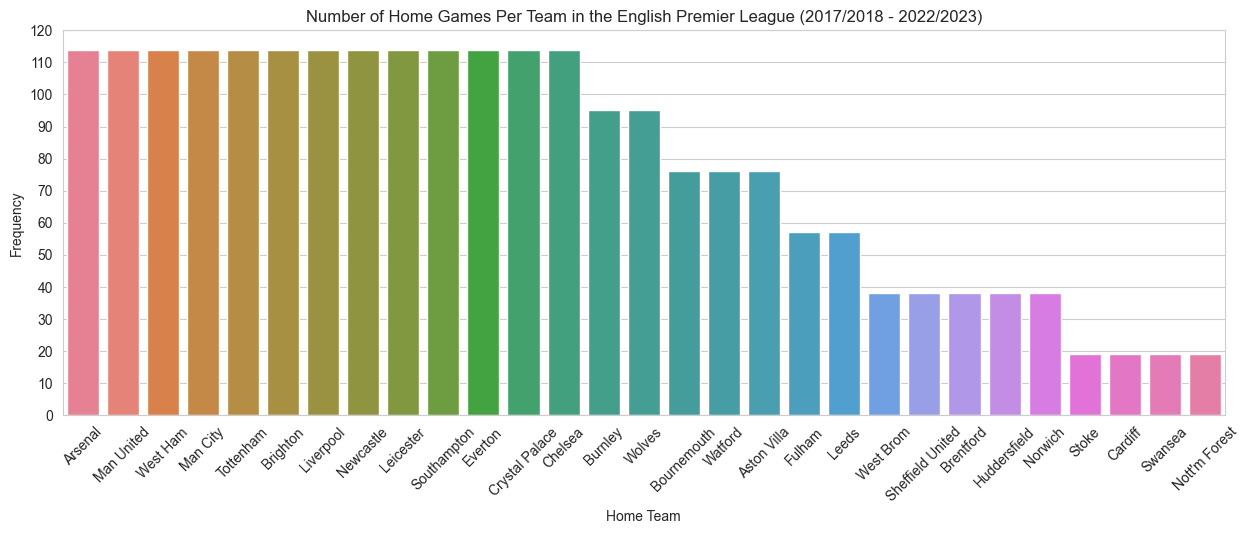

In [122]:
# Find teams with most home games
plt.figure(figsize=(15, 5))
                            
# Create our bar plot
bar_plot = sns.barplot(
    x = match_df['HomeTeam'].value_counts().index,
    y = match_df['HomeTeam'].value_counts().values,
    hue = match_df['HomeTeam'].value_counts().index
)

# Rotate x-axis labels
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45)

# Change the y ticks so we can see the values better
bar_plot.set_yticks(np.arange(0, 130, 10))

# Set the title and axis labels
bar_plot.set_title('Number of Home Games Per Team in the English Premier League (2017/2018 - 2022/2023)')
bar_plot.set_xlabel('Home Team')
bar_plot.set_ylabel('Frequency')

# Display the plot to the screen
plt.show()

In [44]:
# Find number of wins, draws and losses for each team

# Create a new data frame with the home team wins, draws and losses
home_team_wins = match_df[match_df['FTR'] == 'H'].groupby('HomeTeam').size().reset_index(name='HomeTeamWins')
home_team_draws = match_df[match_df['FTR'] == 'D'].groupby('HomeTeam').size().reset_index(name='HomeTeamDraws')
home_team_losses = match_df[match_df['FTR'] == 'A'].groupby('HomeTeam').size().reset_index(name='HomeTeamLosses')

# Merge the home team wins, draws and losses data frames
home_team_results = pd.merge(home_team_wins, home_team_draws, how='left', left_on=['HomeTeam'], right_on=['HomeTeam'])
home_team_results = pd.merge(home_team_results, home_team_losses, how='left', left_on=['HomeTeam'], right_on=['HomeTeam'])

# Create a new data frame with the away team wins, draws and losses
away_team_wins = match_df[match_df['FTR'] == 'A'].groupby('AwayTeam').size().reset_index(name='AwayTeamWins')
away_team_draws = match_df[match_df['FTR'] == 'D'].groupby('AwayTeam').size().reset_index(name='AwayTeamDraws')
away_team_losses = match_df[match_df['FTR'] == 'H'].groupby('AwayTeam').size().reset_index(name='AwayTeamLosses')

# Merge the away team wins, draws and losses data frames
away_team_results = pd.merge(away_team_wins, away_team_draws, how='left', left_on=['AwayTeam'], right_on=['AwayTeam'])
away_team_results = pd.merge(away_team_results, away_team_losses, how='left', left_on=['AwayTeam'], right_on=['AwayTeam'])

# Merge the home and away team results data frames
team_results = pd.merge(home_team_results, away_team_results, how='left', left_on=['HomeTeam'], right_on=['AwayTeam'])

# Drop the extra 'AwayTeam' column
team_results = team_results.drop('AwayTeam', axis=1)

# Rename the columns
team_results = team_results.rename(columns={'HomeTeam': 'Team'})

# Merge the home and away results into one column for win, loss and draw
team_results['Wins'] = team_results['HomeTeamWins'] + team_results['AwayTeamWins']
team_results['Draw'] = team_results['HomeTeamDraws'] + team_results['AwayTeamDraws']
team_results['Losses'] = team_results['HomeTeamLosses'] + team_results['AwayTeamLosses']

# Drop the extra columns
team_results = team_results.drop(['HomeTeamWins', 'HomeTeamDraws', 'HomeTeamLosses', 'AwayTeamWins', 'AwayTeamDraws', 'AwayTeamLosses'], axis=1)

# Sort by the total number of wins
team_results = team_results.sort_values(by=['Wins'], ascending=False)

# Show results to screen
team_results.head(50).reset_index(drop=True)

,Team,Wins,Draw,Losses
0,Man City,174,25,29
1,Liverpool,150,49,29
2,Man United,122,54,52
3,Tottenham,120,40,68
4,Arsenal,120,43,65
5,Chelsea,113,54,61
6,Leicester,88,49,91
7,West Ham,81,51,96
8,Newcastle,79,61,88
9,Everton,77,55,96


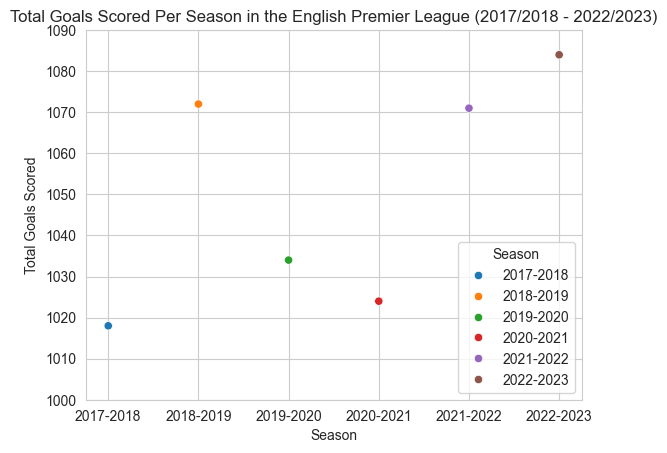

In [121]:
# Find the number of goals scored by season

# create a new data frame with the just the columns we need
goals_per_season = match_df.loc[:, ['FTHG', 'FTAG', 'Season']].groupby('Season').sum()


scatter_plot = sns.scatterplot(
    x = goals_per_season.index,
    y = goals_per_season['FTHG'] + goals_per_season['FTAG'],
    hue = goals_per_season.index
)

# Set the title and axis labels
scatter_plot.set_title('Total Goals Scored Per Season in the English Premier League (2017/2018 - 2022/2023)')
scatter_plot.set_ylabel('Total Goals Scored')

# Change the y ticks so we can see the values better
scatter_plot.set_yticks(np.arange(1000, 1100, 10))

# Add Grid lines
scatter_plot.grid(True)

# Display the plot to the screen
plt.show()


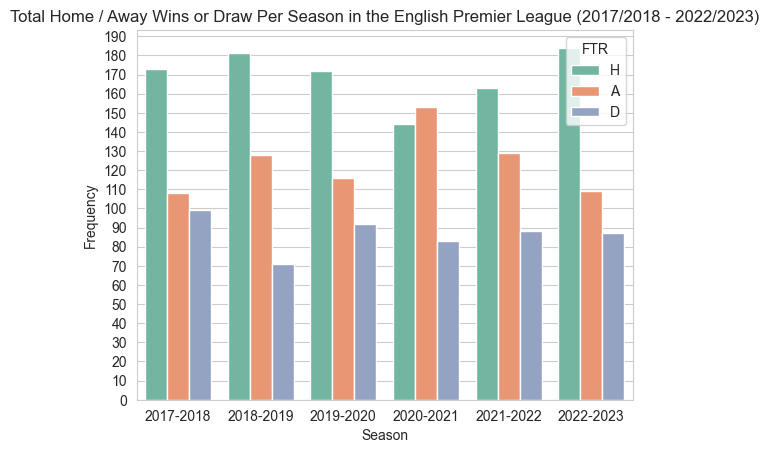

In [120]:
# Find the number of home / away / draw wins by season (as generally home team support will have a positive effect on the home team)

# Create a new data frame with the total home wins and away and draw wins by season
home_away_wins = match_df.loc[:, ['FTR', 'Season']].groupby(['Season'])["FTR"].value_counts().reset_index()
# Create a grouped bar chart
gbar_plot = sns.barplot(
    x = home_away_wins['Season'],
    y = home_away_wins['count'],
    hue = home_away_wins['FTR'],
    palette = "Set2"
)

# Change the y ticks so we can see the values better
gbar_plot.set_yticks(np.arange(0, 200, 10))

# Set the title and axis labels
gbar_plot.set_title('Total Home / Away Wins or Draw Per Season in the English Premier League (2017/2018 - 2022/2023)')
gbar_plot.set_ylabel('Frequency')

# Display the plot to the screen
plt.show()
